# Genetic Algorithm Optimization

## 1. Import Libraries

In [13]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from typing import Tuple, List

sys.path.insert(0, '../')

from src.genetic_algorithm import GeneticAlgorithm
from src.fitness import FitnessEvaluator
from src.decision_tree import DecisionTreeWrapper
from src.config import (
    WEIGHT_THRESHOLD, RANDOM_SEED, 
    SELECTION_METHODS, CROSSOVER_METHODS, MUTATION_METHODS
)
from src.utils import (
    load_dataset, split_data, plot_convergence, 
    plot_feature_reduction, plot_operator_comparison
)

print("✓ All modules imported successfully")

✓ All modules imported successfully


## 2. Loading & Exploring Data

In [14]:
DATASET_PATH = '../data/diabetes_raw_data.csv'

X, y, feature_names = load_dataset(DATASET_PATH)

print("Dataset loaded successfully!")
print(f"Shape: {X.shape}")
print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}")
print(f"\nFeature names ({len(feature_names)}):")
for i, name in enumerate(feature_names, 1):
    print(f"  {i:2d}. {name}")

Dataset loaded successfully!
Shape: (1879, 44)
Samples: 1879, Features: 44

Feature names (44):
   1. PatientID
   2. Age
   3. Gender
   4. Ethnicity
   5. SocioeconomicStatus
   6. EducationLevel
   7. BMI
   8. Smoking
   9. AlcoholConsumption
  10. PhysicalActivity
  11. DietQuality
  12. SleepQuality
  13. FamilyHistoryDiabetes
  14. GestationalDiabetes
  15. PolycysticOvarySyndrome
  16. PreviousPreDiabetes
  17. Hypertension
  18. SystolicBP
  19. DiastolicBP
  20. FastingBloodSugar
  21. HbA1c
  22. SerumCreatinine
  23. BUNLevels
  24. CholesterolTotal
  25. CholesterolLDL
  26. CholesterolHDL
  27. CholesterolTriglycerides
  28. AntihypertensiveMedications
  29. Statins
  30. AntidiabeticMedications
  31. FrequentUrination
  32. ExcessiveThirst
  33. UnexplainedWeightLoss
  34. FatigueLevels
  35. BlurredVision
  36. SlowHealingSores
  37. TinglingHandsFeet
  38. QualityOfLifeScore
  39. HeavyMetalsExposure
  40. OccupationalExposureChemicals
  41. WaterQuality
  42. MedicalC

## 3. Train-Test Split

In [15]:
X_train, X_test, y_train, y_test = split_data(
    X, y, 
    test_size=0.2, 
    random_state=RANDOM_SEED
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Train/Test ratio: {len(X_train)}/{len(X_test)}")

print(f"\nClass distribution (training set):")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for u, c in zip(unique_train, counts_train):
    pct = 100 * c / len(y_train)
    print(f"  Class {int(u)}: {c:4d} ({pct:.1f}%)")

Training set: 1503 samples
Test set: 376 samples
Train/Test ratio: 1503/376

Class distribution (training set):
  Class 0:  901 (59.9%)
  Class 1:  602 (40.1%)


## 4. Initialize GA Components


In [16]:
# Configuration
SELECTION_OP = 'tournament'  
CROSSOVER_OP = 'uniform'    
MUTATION_OP = 'adaptive'     

print("="*70)
print("GA CONFIGURATION")
print("="*70)
print(f"Selection: {SELECTION_OP}")
print(f"Crossover: {CROSSOVER_OP}")
print(f"Mutation: {MUTATION_OP}")
print(f"Population size: 50")
print(f"Generations: 30")
print(f"Mutation rate: 0.01")
print(f"Crossover rate: 0.8")

ga = GeneticAlgorithm(
    X_train, y_train,
    selection=SELECTION_OP,
    crossover=CROSSOVER_OP,
    mutation=MUTATION_OP,
    weight_threshold=0.7,
    random_state=RANDOM_SEED
)

print("\n✓ GA initialized successfully")

GA CONFIGURATION
Selection: tournament
Crossover: uniform
Mutation: adaptive
Population size: 50
Generations: 30
Mutation rate: 0.01
Crossover rate: 0.8

✓ GA initialized successfully


## 5. Run GA Optimization

In [17]:
print("\n" + "="*70)
print("RUNNING GENETIC ALGORITHM")
print("="*70)

best_weights, history = ga.evolve()

print("\n" + "="*70)
print("EVOLUTION COMPLETE")
print("="*70)


RUNNING GENETIC ALGORITHM
Generation 1/50 | Best Fitness: 0.903476 (improved) | Mean Fitness: 0.6485 | Features: 12/44 | No improve: 0
Generation 2/50 | Best Fitness: 0.918313 (improved) | Mean Fitness: 0.7388 | Features: 14/44 | No improve: 0
Generation 3/50 | Best Fitness: 0.918313 | Mean Fitness: 0.8443 | Features: 14/44 | No improve: 1
Generation 4/50 | Best Fitness: 0.924094 (improved) | Mean Fitness: 0.8945 | Features: 12/44 | No improve: 0
Generation 5/50 | Best Fitness: 0.930278 (improved) | Mean Fitness: 0.9080 | Features: 14/44 | No improve: 0
Generation 6/50 | Best Fitness: 0.931838 (improved) | Mean Fitness: 0.9123 | Features: 13/44 | No improve: 0
Generation 7/50 | Best Fitness: 0.932293 (improved) | Mean Fitness: 0.9151 | Features: 11/44 | No improve: 0
Generation 8/50 | Best Fitness: 0.932520 (improved) | Mean Fitness: 0.9260 | Features: 10/44 | No improve: 0
Generation 9/50 | Best Fitness: 0.932520 | Mean Fitness: 0.9193 | Features: 10/44 | No improve: 1
Generation 10/

## 5. Analyze Best Solution

In [18]:
print(f"\nBest Solution Found:")
print(f"  Final Fitness: {ga.best_fitness:.6f}")
print(f"  Features Selected: {n_selected}/{n_total} ({reduction_pct:.1f}% reduction)")

# 1. Create a list of (feature, weight) tuples for selected features
selected_data = []
for feat in selected_features:
    weight = best_weights[feature_names.index(feat)]
    selected_data.append((feat, weight))

# 2. Sort the list by the second element (the weight) in ascending order
# To sort descending (highest weight first), use: reverse=True
selected_data.sort(key=lambda x: x[1], reverse=True)

print(f"\nSelected Features ({n_selected}) - Sorted by Weight:")
for i, (feat, weight) in enumerate(selected_data, 1):
    print(f"  {i:2d}. {feat:25s} (weight: {weight:.4f})")


Best Solution Found:
  Final Fitness: 0.933202


NameError: name 'n_selected' is not defined

## 6. Plot GA History

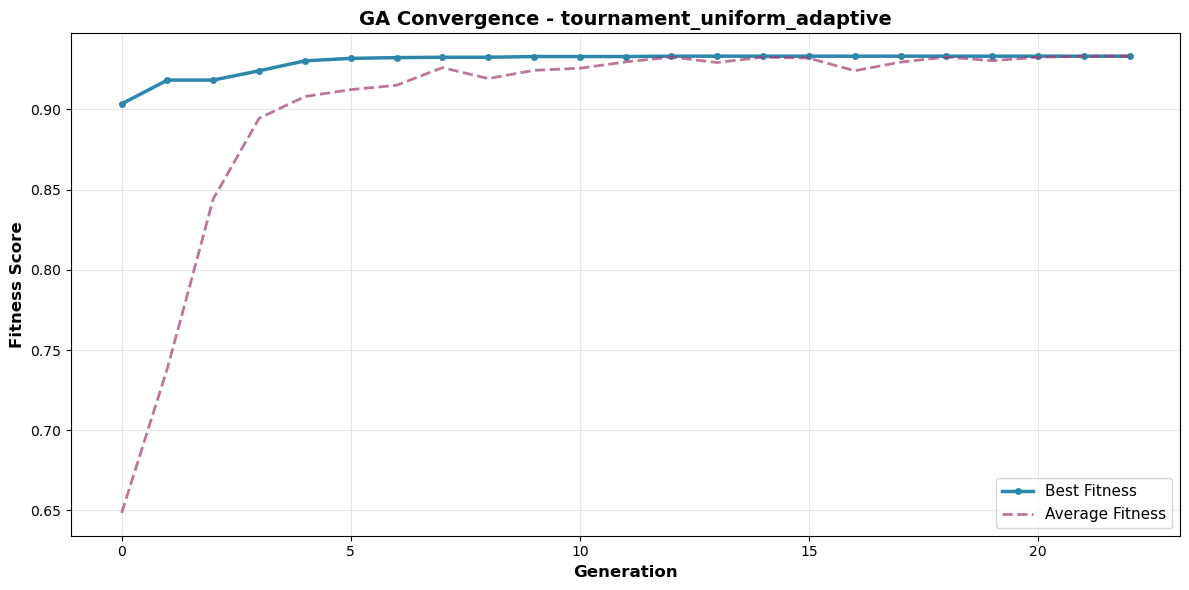

In [ ]:
plt.figure(figsize=(12, 6))
generations = range(len(history['best_fitness']))

plt.plot(generations, history['best_fitness'], 
            label='Best Fitness', linewidth=2.5, color='#2E86AB', marker='o', markersize=4)
plt.plot(generations, history['mean_fitness'], 
            label='Average Fitness', linewidth=2, alpha=0.7, color='#A23B72', linestyle='--')

plt.xlabel('Generation', fontsize=12, fontweight='bold')
plt.ylabel('Fitness Score', fontsize=12, fontweight='bold')
plt.title(f'GA Convergence - {SELECTION_OP}_{CROSSOVER_OP}_{MUTATION_OP}', 
            fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Plot Feature Reduction

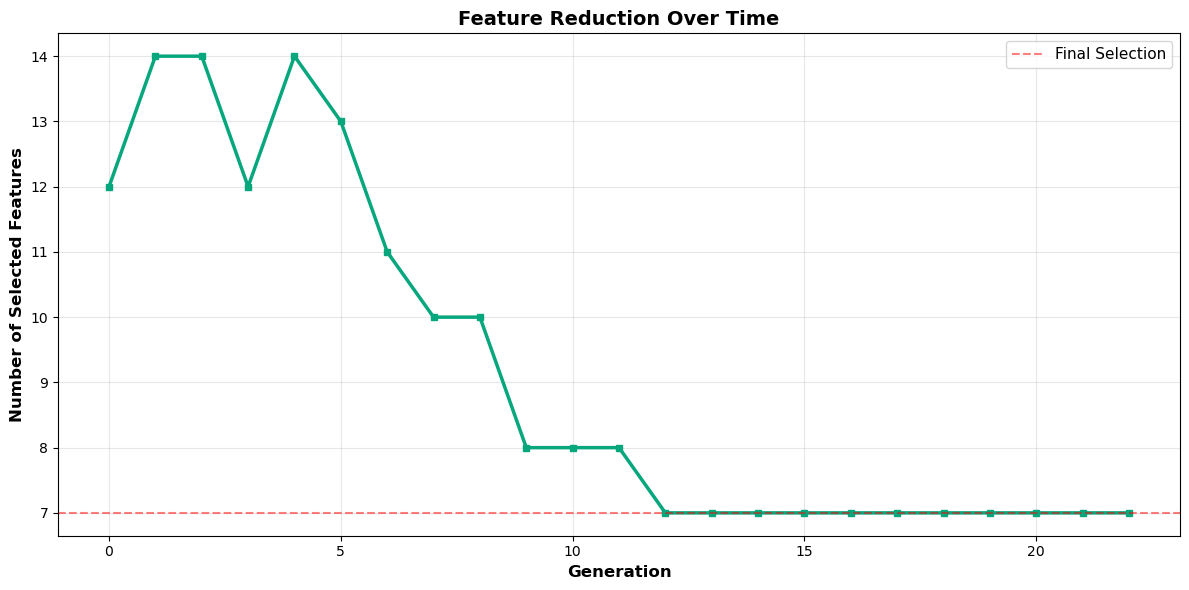

In [ ]:
plt.figure(figsize=(12, 6))
generations = range(len(history['n_selected_features']))

plt.plot(generations, history['n_selected_features'], 
            linewidth=2.5, color='#06A77D', marker='s', markersize=5)
plt.axhline(y=n_selected, color='red', linestyle='--', alpha=0.5, label='Final Selection')

plt.xlabel('Generation', fontsize=12, fontweight='bold')
plt.ylabel('Number of Selected Features', fontsize=12, fontweight='bold')
plt.title('Feature Reduction Over Time', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Evaluate on Test Set

In [ ]:
print("\n" + "="*70)
print("TEST SET EVALUATION")
print("="*70)

if len(selected_indices) > 0:
    X_train_selected = X_train.iloc[:, selected_indices].values
    X_test_selected = X_test.iloc[:, selected_indices].values
    
    dt = DecisionTreeWrapper()
    dt.train(X_train_selected, y_train)
    
    train_accuracy = dt.evaluate(X_train_selected, y_train)
    test_accuracy = dt.evaluate(X_test_selected, y_test)
    
    print(f"\nTraining Accuracy: {train_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    print(f"Generalization Gap: {train_accuracy - test_accuracy:.6f}")
    
else:
    print("No features selected!")
    train_accuracy = 0.0
    test_accuracy = 0.0


TEST SET EVALUATION

Training Accuracy: 0.942116
Test Accuracy: 0.944149
Generalization Gap: -0.002033


## 9. Weight Distribution Analysis

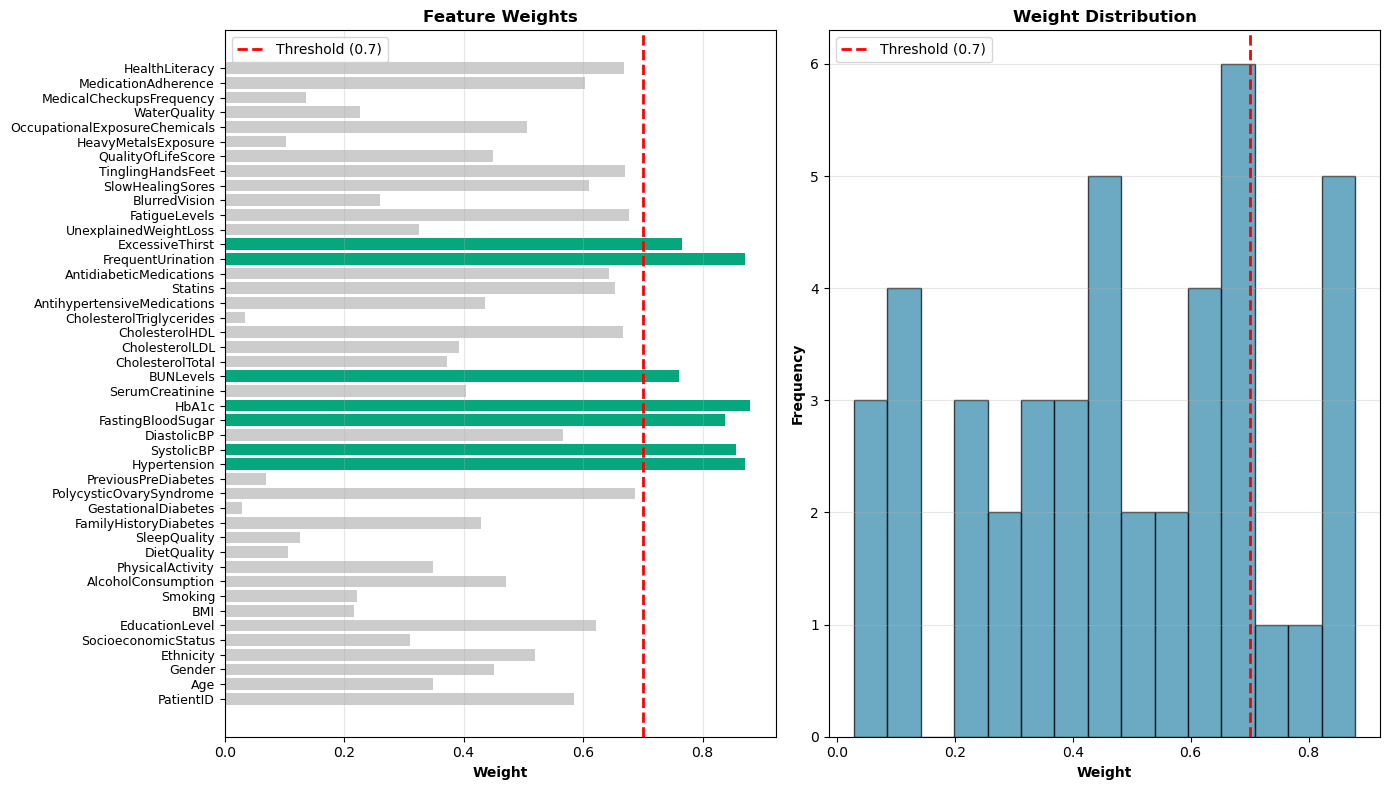

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Bar plot of all weights
axes[0].barh(range(len(feature_names)), best_weights, 
                color=['#06A77D' if w >= 0.7 else '#CCCCCC' for w in best_weights])
axes[0].axvline(x=0.7, color='red', linestyle='--', linewidth=2, label=f'Threshold (0.7)')
axes[0].set_yticks(range(len(feature_names)))
axes[0].set_yticklabels(feature_names, fontsize=9)
axes[0].set_xlabel('Weight', fontweight='bold')
axes[0].set_title('Feature Weights', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='x')

axes[1].hist(best_weights, bins=15, color='#2E86AB', edgecolor='black', alpha=0.7)
axes[1].axvline(x=0.7, color='red', linestyle='--', linewidth=2, label=f'Threshold (0.7)')
axes[1].set_xlabel('Weight', fontweight='bold')
axes[1].set_ylabel('Frequency', fontweight='bold')
axes[1].set_title('Weight Distribution', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 10. Summary Report

In [ ]:
print("\n" + "="*80)
print("GENETIC ALGORITHM FEATURE SELECTION - SUMMARY REPORT")
print("="*80)

print("\n DATASET INFORMATION")
print("-" * 80)
print(f"Total Samples: {len(X)}")
print(f"Training Samples: {len(X_train)}")
print(f"Test Samples: {len(X_test)}")
print(f"Total Features: {len(feature_names)}")
print(f"Target Classes: {len(np.unique(y))}")

print("\n GA CONFIGURATION")
print("-" * 80)
print(f"Selection Method: {SELECTION_OP}")
print(f"Crossover Method: {CROSSOVER_OP}")
print(f"Mutation Method: {MUTATION_OP}")
print(f"Population Size: 50")
print(f"Generations: {len(history['best_fitness'])}")
print(f"Best Fitness: {ga.best_fitness:.6f}")

print("\n FEATURE SELECTION RESULTS")
print("-" * 80)
print(f"Original Features: {n_total}")
print(f"Selected Features: {n_selected}")
print(f"Reduction: {reduction_pct:.1f}%")
print(f"\nSelected Features:")
for i, feat in enumerate(selected_features, 1):
    weight_idx = feature_names.index(feat)
    weight = best_weights[weight_idx]
    print(f"  {i:2d}. {feat:30s} (weight: {weight:.4f})")

print("\n PERFORMANCE METRICS")
print("-" * 80)
print(f"Training Accuracy: {train_accuracy:.6f}")
print(f"Test Accuracy: {test_accuracy:.6f}")
print(f"Generalization Gap: {abs(train_accuracy - test_accuracy):.6f}")

print("\n" + "="*80)


GENETIC ALGORITHM FEATURE SELECTION - SUMMARY REPORT

 DATASET INFORMATION
--------------------------------------------------------------------------------
Total Samples: 1879
Training Samples: 1503
Test Samples: 376
Total Features: 44
Target Classes: 2

 GA CONFIGURATION
--------------------------------------------------------------------------------
Selection Method: tournament
Crossover Method: uniform
Mutation Method: adaptive
Population Size: 50
Generations: 23
Best Fitness: 0.933202

 FEATURE SELECTION RESULTS
--------------------------------------------------------------------------------
Original Features: 44
Selected Features: 7
Reduction: 84.1%

Selected Features:
   1. Hypertension                   (weight: 0.8708)
   2. SystolicBP                     (weight: 0.8557)
   3. FastingBloodSugar              (weight: 0.8370)
   4. HbA1c                          (weight: 0.8785)
   5. BUNLevels                      (weight: 0.7610)
   6. FrequentUrination              (weight: 